In [3]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/93/21/9b035a4f823d6aee2917c75415be9a95861ff3d73a0a65e48edbf210cec1/tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.15.0-cp311-cp311-win_amd64.whl.metadata (3.6 kB)
  Obtaining dependency information for tensorflow-intel==2.15.0 from https://files.pythonhosted.org/packages/4c/48/1a5a15517f18eaa4ff8d598b1c000300b20c1bb0e624539d702117a0c369/tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow_intel-2.15.0-cp311-cp311-win_amd64.whl.metadata (5.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Using cached absl_py-2.0.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Obtaining dependency information for flatbuffers>=23.5.26

In [4]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

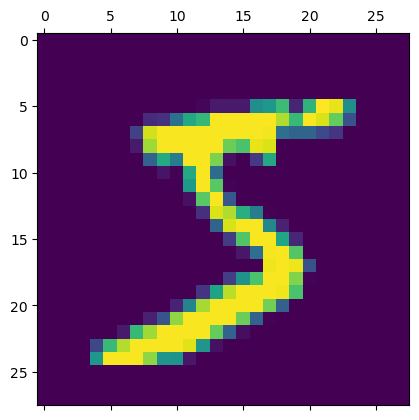

In [10]:
plt.matshow(x_train[0])

In [11]:
y_train[0]

5

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train=x_train/255
x_test=x_test/255

In [15]:
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [16]:
print(x_train_flattened.shape)
print(x_test_flattened.shape)

(60000, 784)
(10000, 784)


In [17]:
model = keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)



Epoch 1/5


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4683 - accuracy: 0.8774
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3036 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2834 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2727 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2668 - accuracy: 0.9258


In [18]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2704 - accuracy: 0.9256


[0.27035942673683167, 0.925599992275238]

In [19]:
y_predicted=model.predict(x_test_flattened)

313/313 [==============================] - 1s 2ms/step


In [20]:
y_predicted[1]

array([4.15583938e-01, 1.58300670e-03, 9.98979390e-01, 3.31272483e-01,
       3.17382204e-10, 7.69447446e-01, 8.66051316e-01, 5.05178907e-13,
       1.04802154e-01, 2.94472202e-09], dtype=float32)

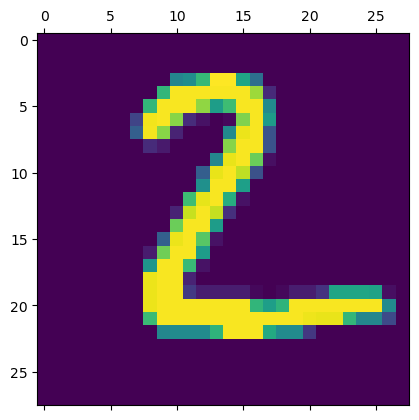

In [21]:
plt.matshow(x_test[1])

In [22]:
y_predicted_lables=[np.argmax(i) for i in y_predicted]

In [23]:
np.argmax(y_predicted[1])

2

In [28]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_lables)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 966,    0,    1,    2,    0,    5,    3,    2,    1,    0],
       [   0, 1105,    4,    2,    0,    1,    4,    2,   17,    0],
       [   8,    8,  913,   19,    7,    4,   12,   10,   46,    5],
       [   3,    0,   14,  927,    0,   23,    2,   10,   22,    9],
       [   2,    1,    5,    2,  897,    0,    9,    4,   10,   52],
       [  11,    1,    2,   31,    7,  783,   11,    7,   32,    7],
       [  14,    3,    7,    1,    7,   15,  907,    2,    2,    0],
       [   1,    5,   22,    7,    5,    0,    0,  953,    2,   33],
       [   9,    4,    5,   23,    9,   22,    8,   12,  872,   10],
       [  11,    6,    1,   10,   17,    5,    0,   19,    7,  933]])>

Text(95.72222222222221, 0.5, 'Truth')

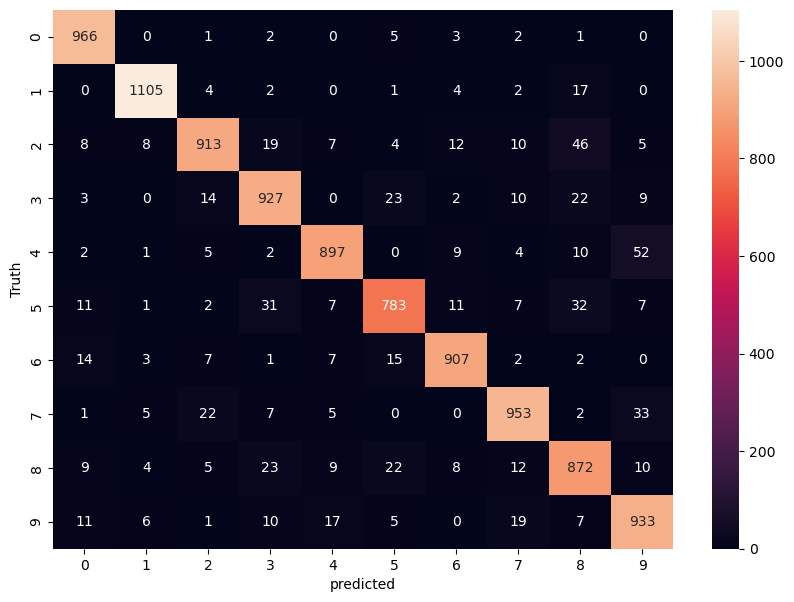

In [29]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [26]:
model = keras.Sequential([
    keras.layers.Dense(1000,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1860 - accuracy: 0.9441
Epoch 2/5
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0749 - accuracy: 0.9762
Epoch 3/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0480 - accuracy: 0.9850
Epoch 4/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0348 - accuracy: 0.9885
Epoch 5/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0268 - accuracy: 0.9911


In [27]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0652 - accuracy: 0.9824


[0.06522170454263687, 0.9824000000953674]

In [68]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')

])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2782 - accuracy: 0.9218
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1288 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0910 - accuracy: 0.9727
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0691 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0541 - accuracy: 0.9833
